In [1]:
from tensorflow.keras.datasets import cifar10

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


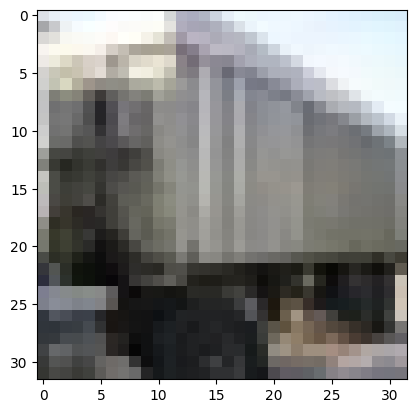

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

random_idx=np.random.randint(0,len(x_train))

image=x_train[random_idx]

plt.imshow(image)
plt.show()

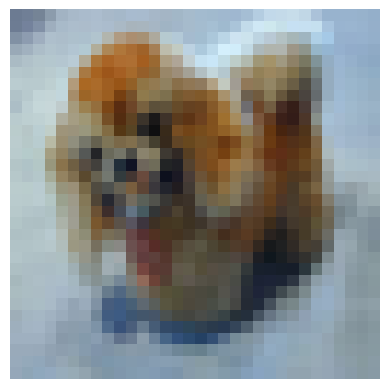

In [11]:
random_idx=np.random.randint(0,len(x_train))

image=x_train[random_idx]

plt.imshow(image)
plt.axis('off')
plt.show()

In [13]:
image_reshaped=image.reshape(-1,3)

print(image_reshaped)

[[108 123 146]
 [112 127 150]
 [117 132 150]
 ...
 [137 155 168]
 [135 153 161]
 [136 154 165]]


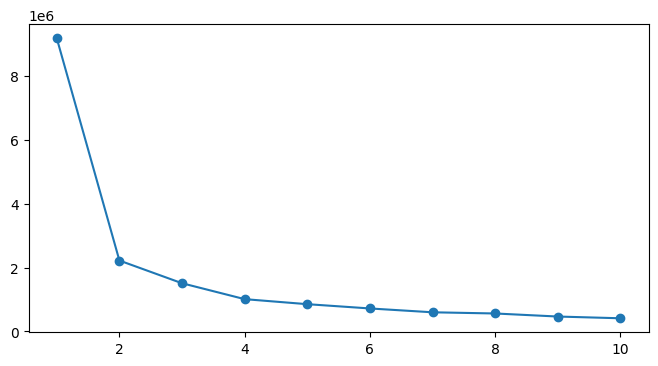

In [18]:
inertia=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(image_reshaped)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1,11),inertia,'-o')
plt.show()

In [19]:
k=4;

kmeans=KMeans(n_clusters=4,random_state=32)
kmeans.fit(image_reshaped)


KMeans(n_clusters=4, random_state=32)

(-0.5, 31.5, 31.5, -0.5)

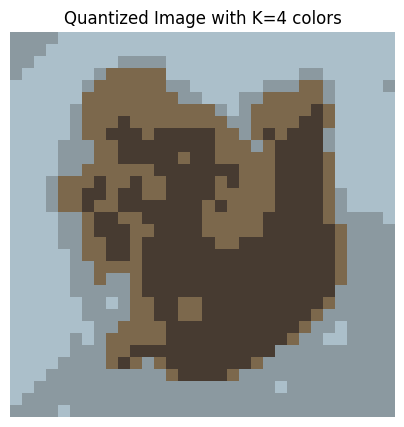

In [23]:

image_quantized=kmeans.cluster_centers_[kmeans.labels_]
quantized_image = image_quantized.reshape(image.shape)

plt.figure(figsize=(5,5))
plt.imshow(np.uint8(quantized_image))
plt.title(f'Quantized Image with K={k} colors')
plt.axis('off')

(-0.5, 31.5, 31.5, -0.5)

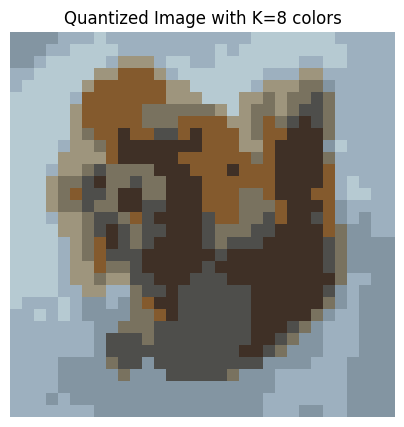

In [25]:

kmeans=KMeans(n_clusters=8,random_state=32)
kmeans.fit(image_reshaped)

image_quantized=kmeans.cluster_centers_[kmeans.labels_]
quantized_image = image_quantized.reshape(image.shape)

plt.figure(figsize=(5,5))
plt.imshow(np.uint8(quantized_image))
plt.title(f'Quantized Image with K={8} colors')
plt.axis('off')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: ConvergenceWarning: Number of distinct clusters (985) found smaller than n_clusters (1000). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


(-0.5, 31.5, 31.5, -0.5)

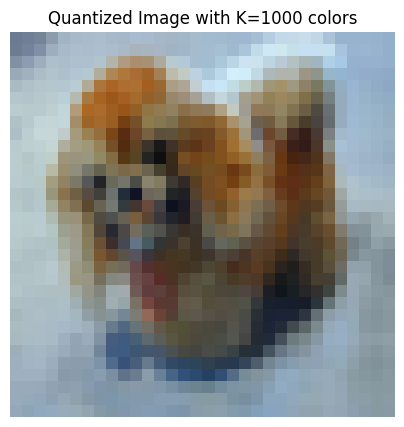

In [35]:

kmeans=KMeans(n_clusters=1000,random_state=32)
kmeans.fit(image_reshaped)

image_quantized=kmeans.cluster_centers_[kmeans.labels_]
quantized_image = image_quantized.reshape(image.shape)

plt.figure(figsize=(5,5))
plt.imshow(np.uint8(quantized_image))
plt.title(f'Quantized Image with K={1000} colors')
plt.axis('off')